### Removing outliers using std.dev

In [77]:
import pandas as pd
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [68]:
df.shape

(10000, 2)

In [73]:
df.describe()

,height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [74]:
df.height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
9995    66.172652
9996    67.067155
9997    63.867992
9998    69.034243
9999    61.944246
Name: height, Length: 10000, dtype: float64

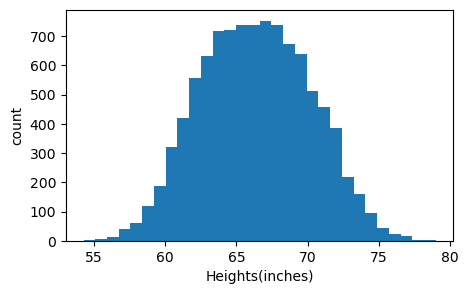

In [75]:
#plt.figure(figsize=(5,7))
plt.hist(df.height,bins=30)
plt.xlabel('Heights(inches)')
plt.ylabel('count')
plt.show()

In [76]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(5,3)

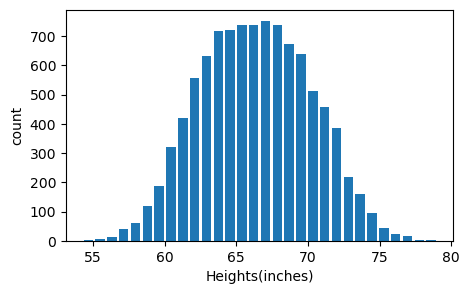

In [48]:

plt.hist(df.height,bins=30,rwidth=0.8)
plt.xlabel('Heights(inches)')
plt.ylabel('count')
plt.show()

In [50]:
df.height.min()

54.26313333

In [51]:
df.height.max()

78.99874235

In [52]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

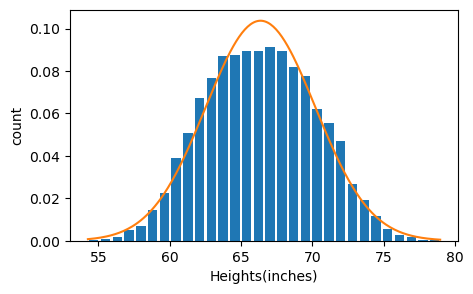

In [49]:
import numpy as np
from scipy.stats import norm
plt.hist(df.height,bins=30,rwidth=0.8,density=True)
plt.xlabel('Heights(inches)')
plt.ylabel('count')

rng=np.arange(df.height.min(),df.height.max(),0.1)              # for plotting bell curve
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))
plt.show()

In [53]:
df.height.mean()

66.367559754866

In [54]:
df.height.std()                          # we can take any std.dev  here I'm taking 3rd std.dev

3.847528120795573

In [55]:
upper_limit=df.height.mean()+3*df.height.std()    
upper_limit                                             # any value above 77 is considered as an outlires

77.91014411725271

In [56]:
lower_limit=df.height.mean()-3*df.height.std()
lower_limit                                              # any value below 54 is considered as an outlires

54.824975392479274

In [60]:
df[(df.height<lower_limit)|(df.height>upper_limit)]       # outliers

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [62]:
new_df=df[(df.height>lower_limit)&(df.height<upper_limit)]     # removing outliers

In [63]:
new_df.sample(10)

,gender,height
3614,Male,71.622266
7335,Female,64.446004
2182,Male,69.250776
1725,Male,68.031172
6709,Female,68.991691
2903,Male,68.260019
3429,Male,68.312478
1665,Male,70.389201
4820,Male,65.659505
2457,Male,68.763771


In [64]:
new_df.describe()

,height
count,9993.000000
mean,66.363856
std,3.835511
min,54.873728
25%,63.505894
50%,66.317755
75%,69.169353
max,77.547186


In [65]:
new_df.shape

(9993, 2)

In [66]:
df.shape[0]-new_df.shape[0]        

7

### Removing outliers using z score

In [78]:
df['zscore']=(df.height-df.height.mean())/df.height.std()                 # create zscore new clmn

In [87]:
df.head(10)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
5,Male,67.253016,0.230136
6,Male,68.785081,0.628331
7,Male,68.348516,0.514865
8,Male,67.018950,0.169301
9,Male,63.456494,-0.756607


In [88]:
(73.847017-66.367559754866)/3.847528120795573                                                    # filter out above 3.84 and below -3.84 are outliers

1.9439642831219734

In [86]:
df[df['zscore']>3].sample(3)

,gender,height,zscore
1317,Male,78.462053,3.143445
3757,Male,78.621374,3.184854
2014,Male,78.998742,3.282934


In [89]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [90]:
df[(df['zscore']<-3)|(df['zscore']>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [92]:
new_df1=df[(df['zscore']>-3)&(df['zscore']<3)]

In [96]:
new_df1.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [97]:
df.shape[0]-new_df.shape[0]

7

### Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [6]:
import pandas as pd
dataset=pd.read_csv('bhp.csv')

In [101]:
dataset.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [7]:
dataset.shape

(13200, 7)

In [8]:
dataset['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [9]:
dataset['price_per_sqft'].min()

267

In [10]:
dataset['price_per_sqft'].max()

12000000

In [11]:
lower_bound,upper_bound,=dataset['price_per_sqft'].quantile([0.001,0.999])
lower_bound,upper_bound

(1366.184, 50959.36200000098)

In [12]:
#step-1:
dataset[(dataset['price_per_sqft']<lower_bound) | (dataset['price_per_sqft']>upper_bound)]   # finding outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [13]:
new_dataset=dataset[(dataset['price_per_sqft']>lower_bound) & (dataset['price_per_sqft']<upper_bound)]
new_dataset.shape

(13172, 7)

In [14]:
dataset.shape

(13200, 7)

In [15]:
dataset.shape[0]-new_dataset.shape[0]       # we removed 28 outliers

28

In [16]:
#step-2:
new_dataset.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [17]:
new_dataset.shape

(13172, 7)

In [18]:
new_dataset['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [19]:
new_dataset['price_per_sqft'].min()

1379

In [20]:
new_dataset['price_per_sqft'].max()

50349

In [21]:
new_dataset['price_per_sqft'].mean()

6663.6537351958705

In [22]:
new_dataset['price_per_sqft'].std()

4141.020700174605

In [23]:
upper_limit=new_dataset['price_per_sqft'].mean()+4*new_dataset['price_per_sqft'].std()
upper_limit

23227.73653589429

In [25]:
# (or) lower_limit=new_dataset.price_per_sqft.mean()+4*new_dataset.price_per_sqft.std()
#lower_limit

In [26]:
lower_limit=new_dataset['price_per_sqft'].mean()-4*new_dataset['price_per_sqft'].std()
lower_limit

-9900.429065502549

In [27]:
new_dataset[(new_dataset.price_per_sqft<lower_limit) | (new_dataset.price_per_sqft>upper_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
11838,Vijayanagar,4 Bedroom,1500.0,4.0,360.0,4,24000
9419,HSR Layout,9 Bedroom,1200.0,9.0,350.0,9,29166
9290,other,4 Bedroom,2400.0,3.0,750.0,4,31250
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352
5654,other,4 Bedroom,4920.0,5.0,1150.0,4,23373
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
12334,Indira Nagar,4 Bedroom,2400.0,4.0,700.0,4,29166
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260
10000,other,6 Bedroom,1200.0,5.0,280.0,6,23333


In [28]:
#step-3:
new_df=new_dataset[(new_dataset.price_per_sqft>lower_limit) & (new_dataset.price_per_sqft<upper_limit)]

In [29]:
new_df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
8860,Indira Nagar,3 BHK,2200.0,3.0,160.0,3,7272
4870,TC Palaya,3 Bedroom,1200.0,2.0,66.0,3,5500
9130,Whitefield,3 BHK,1600.0,3.0,95.0,3,5937
10287,Singasandra,3 BHK,1510.0,3.0,75.0,3,4966
6138,Hormavu,4 Bedroom,3000.0,4.0,100.0,4,3333


In [30]:
new_df.shape

(13047, 7)

In [31]:
new_dataset.shape[0]-new_df.shape[0]      # removed 125 outliers. The result would be exactly same as 4 standard deviation

125

In [32]:
new_df.price_per_sqft.describe()

count    13047.000000
mean      6449.328045
std       3487.670005
min       1379.000000
25%       4259.000000
50%       5415.000000
75%       7222.000000
max      23214.000000
Name: price_per_sqft, dtype: float64

In [33]:
# step:4
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(5,3)


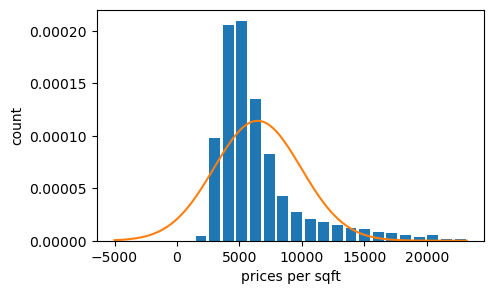

In [35]:
from scipy.stats import norm
plt.hist(new_df.price_per_sqft,bins=20,rwidth=0.8,density=True)
plt.xlabel('prices per sqft')
plt.ylabel('count')


rng=np.arange(-5000,new_df.price_per_sqft.max(),100)
plt.plot(rng,norm.pdf(rng,new_df.price_per_sqft.mean(),new_df.price_per_sqft.std()))
plt.show()

### Treating Zscore of 4 to remove outliers

In [39]:
new_dataset['zscore']=(new_dataset.price_per_sqft-new_dataset.price_per_sqft.mean())/new_dataset.price_per_sqft.std()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_27276\2365110782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['zscore']=(new_dataset.price_per_sqft-new_dataset.price_per_sqft.mean())/new_dataset.price_per_sqft.std()


In [49]:
new_dataset.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
12711,other,4 Bedroom,2400.0,4.0,150.0,4,6250,-0.099892
8821,Thanisandra,3 BHK,1573.0,3.0,98.0,3,6230,-0.104721
8233,other,4 Bedroom,2100.0,6.0,100.0,4,4761,-0.459465
10198,other,2 BHK,1050.0,2.0,45.0,2,4285,-0.574412
7564,other,4 BHK,3754.0,6.0,480.0,4,12786,1.478463
9359,TC Palaya,2 BHK,1800.0,2.0,80.0,2,4444,-0.536016
10512,KR Puram,5 BHK,3300.0,3.0,255.0,5,7727,0.256784
9571,Kengeri,2 BHK,1200.0,2.0,42.0,2,3500,-0.763979
12830,Jakkur,3 BHK,1710.0,3.0,110.0,3,6432,-0.055941
4219,HAL 2nd Stage,3 BHK,1490.0,2.0,300.0,3,20134,3.252905


In [47]:
new_dataset[new_dataset.zscore<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [48]:
new_dataset[new_dataset['zscore']>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [51]:
new_dataset[(new_dataset['zscore']>4)| (new_dataset['zscore']<-4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [56]:
#step:5
new_df1=new_dataset[(new_dataset['zscore']<4)& (new_dataset['zscore']>-4)]

In [57]:
new_df1.shape

(13047, 8)

In [59]:
new_dataset.shape[0]-new_df1.shape[0]    # in this step also we removed 125 outlires

125